# project Investigate a Dataset , on the TMDb movie data


# Table of content
- [Introduction](#intro)
- [Data Wrangling](#Wrangling)
- [EDA](#EDA)
- [Conclusions](#Conc)






# <div id='intro'/>
# introduction

 We are going to analyse the TMDb movie dataset that contians information about each movie as movie rating , budge ,revenue ,runtime , cast, director ,realse date and more . we will use these information to undersand the datatset better and answer some questions such as 
Q1:Which genres are
most popular from
year to year? 
Q2What kinds of properties
are associated with
movies that have high
revenues?


In [1]:
#  import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


# Data Wrangling
# <div id='#Wrangling'/>


in this part we going to load our data , explor it a bit , check for cleanless and trim and clean the data .

In [2]:
#load the data
dataf = pd.read_csv('tmdb-movies.csv')
dataf.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
dataf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
dataf.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## cleaning 

In [6]:
# we can drop the columns that are less related to the question we want to answer 

In [7]:
df=dataf.drop(['imdb_id','homepage','tagline','overview','production_companies','budget_adj',
       'revenue_adj','keywords', 'cast', 'director'], axis=1, inplace=False)

In [8]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [9]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [10]:
# do we have any misssing values ?
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [11]:
#drop the na vlaues from the genres columns , it is only 23 so we can drop them
df.dropna(axis='index', how='any', inplace=True)

In [12]:
df.isna().sum()
# we can see that we removed the missing values

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [13]:
#lets Check if there is a duplicate 
df.duplicated().value_counts()

False    10842
True         1
dtype: int64

In [14]:
# lets drop the duplicate  and only keep the first one  
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [15]:
#check if we get rid of it 
df.duplicated().value_counts()

False    10842
dtype: int64

In [16]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10842, dtype: object

In [17]:
#we need first to fix the format of the genres 
genre = df['genres'].str.split('|').tolist()

In [18]:
genre

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

In [19]:
# convert the list into a datafram so we can use it later
df_genre=pd.DataFrame(genre,index=df['id'])

In [20]:
df_genre.head(5)
# we can use the first genra as it usually the most relative one and also most of the movies only have 2 or 1 genre to discribe them so we dont need the all 4 

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


In [21]:
# drop all columns expect the first one 
df_genre=df_genre.drop([1,2,3,4], axis=1, inplace=False)

In [22]:
df_genre.head(20)

,0
id,
135397,Action
76341,Action
262500,Adventure
140607,Action
168259,Action
281957,Western
87101,Science Fiction
286217,Drama
211672,Family


In [23]:
# lest merge the 2 dataframes(the genre an) togother 

In [24]:
df= pd.merge(df, df_genre, on='id')

In [25]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,0
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,Action
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,Adventure
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,Action
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,Action


In [26]:
# rename the "0" column as genra and drop the unformated genres column
df=df.drop("genres", axis=1, inplace=False)
df = df.rename(columns={0:'genres'})

In [27]:
#check for the datatypes if we need to fix it 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   release_date    10842 non-null  object 
 7   vote_count      10842 non-null  int64  
 8   vote_average    10842 non-null  float64
 9   release_year    10842 non-null  int64  
 10  genres          10842 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1016.4+ KB


In [28]:
# fix the release_date datatype to datetime
df['release_date'] = pd.to_datetime(df.release_date)

In [29]:
# the datafram after we finsh cleaning 
df.head()

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,Action
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,Action
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,Adventure
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,Action
4,168259,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,Action


## Exploratory Data Analysis
<div id='EDA'/>

In this part we are going to explore the data more. Also, visualizing some relation and answering the question that we asked above.

In [30]:
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

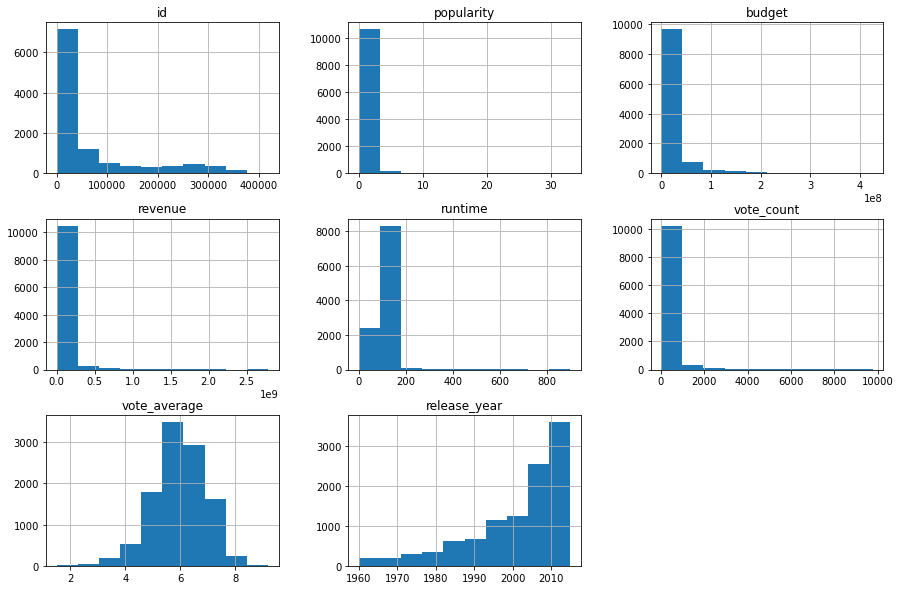

In [31]:
# explore the data
df.hist(figsize=(15,10))

Text(0, 0.5, 'Frequency')

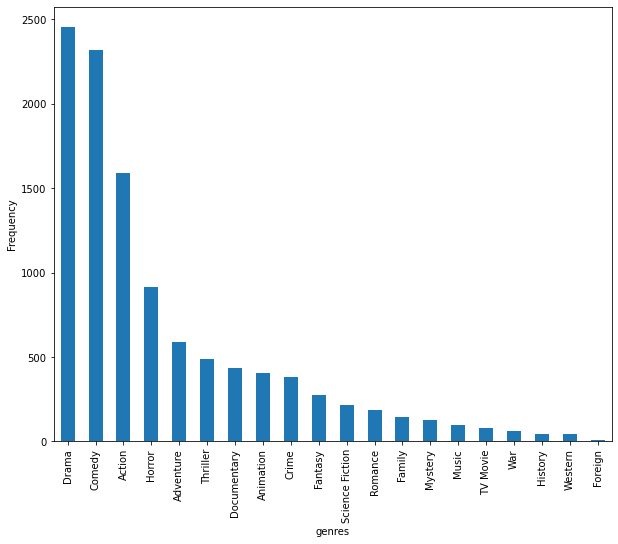

In [32]:
ax = df['genres'].value_counts().plot(kind='bar', figsize=(10,8),)
ax.set_xlabel("genres")
ax.set_ylabel("Frequency")

## Q1:Which genres are most popular from year to year?

In [33]:
# what is our relase year range ?(from when to when ?)
df['release_year'].value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [34]:
#create a filter for movies from 2015:2010 and so one 
m_2010_to_2015=df['release_year']>2010
m_2000_to_2010=df['release_year'].between(2000,2010)
m_1990_to_2000=df['release_year'].between(1990,2000)
m_1980_to_1990=df['release_year'].between(1980,1990)
m_1970_to_1980=df['release_year'].between(1970,1980)
m_1960_to_1970=df['release_year'].between(1960,1970)


In [35]:
a=df.genres[m_2010_to_2015].value_counts()
b=df.genres[m_2000_to_2010].value_counts()
c=df.genres[m_1990_to_2000].value_counts()
d=df.genres[m_1980_to_1990].value_counts()
e=df.genres[m_1970_to_1980].value_counts()
f=df.genres[m_1960_to_1970].value_counts()


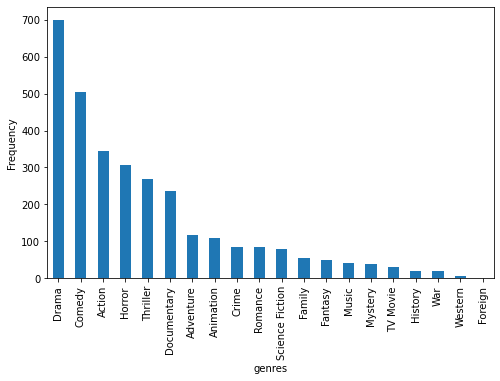

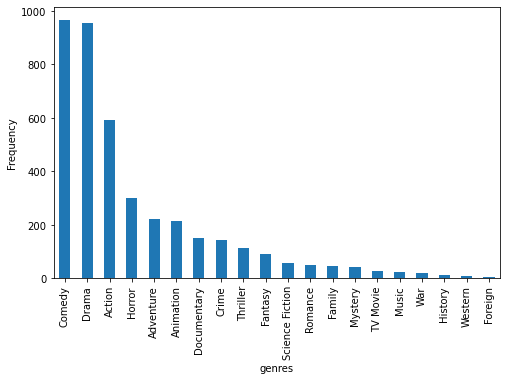

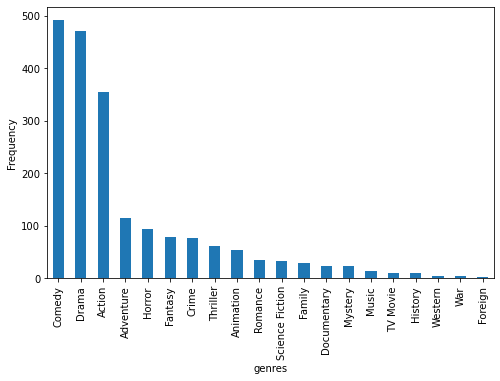

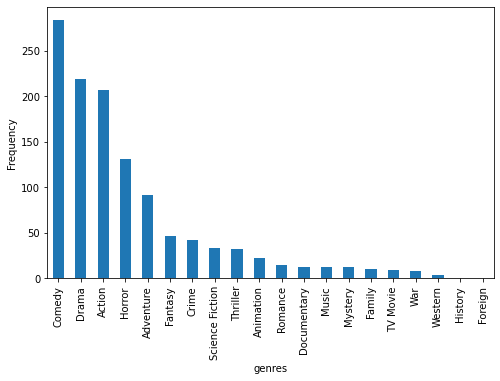

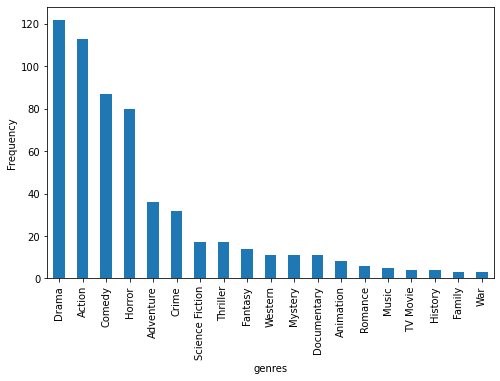

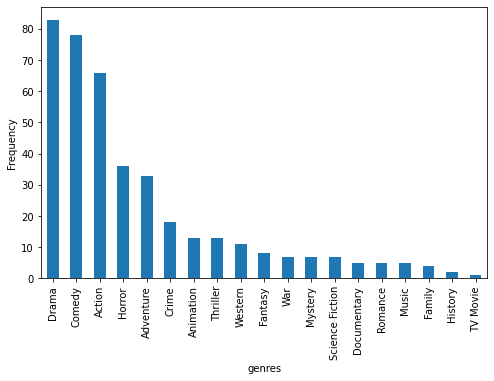

In [36]:
#l_years=list[a,b,c,d,e,f]
for i in a,b,c,d,e,f:
    
    ax = i.plot(kind='bar',figsize=(8,5),)
    ax.set_xlabel("genres")
    ax.set_ylabel("Frequency")
    plt.show()
   

 we can see that drama is the most popular genre in 2010:2015 , 1960:1970 and 1970:1980 time periods but 
 comady is the most popular  genre in 2000:2010 , 1990:2000 , and 1980:1990 time periods (from 1980:2000). 
 foreign is the least popular genre from 1980:2010.
 war is the least popular genre from 1970:1980.
 TV Movie is the least popular genre from 1960:1970. 
 

## Q2: what is realtionship between revenue and the budet of the movie ?

In [37]:
# first we neeed to find the average revenue 
ave_revenue=df['revenue'].mean()

In [38]:
# then we are gonning to divide the into
above_ave_revenue = df['revenue'] > ave_revenue
below_ave_revenue = df['revenue'] <= ave_revenue

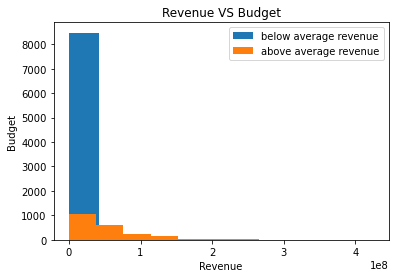

In [39]:
# plot relationship between Revenue and Budget
df.budget[below_ave_revenue].plot(kind='hist' ,label='below average revenue')
df.budget[above_ave_revenue ].plot(kind='hist' ,label='above average revenue')

plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Revenue VS Budget')
plt.legend()

we find out that movies with smaller buget are actually achieve more revenue 

# Q2: what is realtionship between revenue and the vote/rating of the movie ?

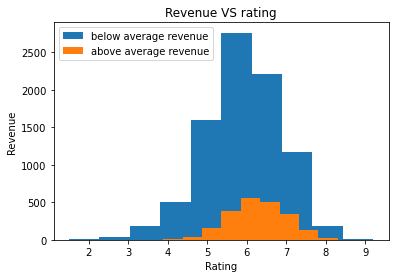

In [40]:
df.vote_average[below_ave_revenue].plot(kind='hist' ,label='below average revenue')
df.vote_average[above_ave_revenue ].plot(kind='hist' ,label='above average revenue')

plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.title('Revenue VS rating')
plt.legend()

 we can see that in the center of the histgram movies with higher and lower than average Revenue can have hige and more than avrager rating so rating usually dosenot get affected that much with the movie Revenue , but movies with blow average Revenue are the one that usually get bad rating  

# Conclusions
<div id='Conc'/>


In conclusion, after we investigate the TMDb movie dataset, we can find out that the revenues dont get affect by the budget many movies achieve higher revenues with small budget
also the revenues dont get affect by the rating but bad ratings can have a negative impact on revenues.

